*ENTER* YOUR API KEY IN VARIABLE CALLED 'API_KEY'

In [2]:
from google.colab import userdata
import requests
import pandas as pd

API_KEY = userdata.get("YOUTUBE_API_KEY")

if API_KEY is None:
    raise ValueError("API key not found. Add it in Colab Secrets.")



CALCULATING VIRALITY SCORE AS "virality_score = ((likes + comments) / views * 100)"

In [6]:
def fetch_trending_videos(region="IN", max_results=50):
    url = "https://www.googleapis.com/youtube/v3/videos"
    params = {
        "part": "snippet,statistics",
        "chart": "mostPopular",
        "regionCode": region,
        "maxResults": max_results,
        "key": API_KEY
    }

    r = requests.get(url, params=params)
    data = r.json()

    videos = []
    for item in data.get("items", []):
        stats = item["statistics"]
        snippet = item["snippet"]

        views = int(stats.get("viewCount", 0))
        likes = int(stats.get("likeCount", 0))
        comments = int(stats.get("commentCount", 0))

        virality_score = ((likes + comments) / views * 100) if views > 0 else 0

        videos.append({
            "Title": snippet["title"],
            "Channel": snippet["channelTitle"],
            "Views": views,
            "Likes": likes,
            "Comments": comments,
            "Virality Score": round(virality_score, 2),
            "URL": f"https://www.youtube.com/watch?v={item['id']}"
        })

    return pd.DataFrame(videos)


In [7]:
df = fetch_trending_videos()
df = df.sort_values("Virality Score", ascending=False)
df.head(10)


,Title,Channel,Views,Likes,Comments,Virality Score,URL
11,Long Slide Game with Cow Elephant Gorilla Hipp...,UltraLogic Media,364611,107887,3399,30.52,https://www.youtube.com/watch?v=3c-ZIbpATo8
38,MY LAST REPLY TO GYAN GAMING AND RAISTAR CONTR...,BIN ZAID,99884,16413,4228,20.66,https://www.youtube.com/watch?v=uKYJBSDKxVM
0,Jana Nayagan – Chella Magale Lyrical | Thalapa...,T-Series,1672213,281969,11834,17.57,https://www.youtube.com/watch?v=fDvVCS17P5A
41,Long Slide Game With Elephant Gorilla Buffalo ...,FunAnimationLive NumAnima,372639,54307,1024,14.85,https://www.youtube.com/watch?v=JujhrZJqBt8
48,Rao Sahabni 2 | Shyam Yadav | Sanjana Yaduvans...,SS Real Music,62109,7566,286,12.64,https://www.youtube.com/watch?v=QTHxcJslDlA
35,Maya Ek Pishachini - New Indian Horror Game,Live Insaan,196189,19940,2220,11.30,https://www.youtube.com/watch?v=NGhq59rVENc
12,"Hard Heigala Sanga l Untalented Guy, Piyush Tr...",BABU BHAI PRODUCTION,399741,42664,1554,11.06,https://www.youtube.com/watch?v=_4xN9-ZzuRA
3,Annthamma Jodetthu Kano Lyrical Video | KD-Kan...,Anand Audio,308088,29377,2311,10.29,https://www.youtube.com/watch?v=djVbiwLVmw0
36,Nangonda Hekta Tai - Official Release | Swamik...,Swamikumar Oinam,157521,14732,613,9.74,https://www.youtube.com/watch?v=31zjPK_DB4Q
17,I MADE A NEW PC 🤑| SETUP TOUR,LitFleet,439948,38015,2010,9.10,https://www.youtube.com/watch?v=DH_lIS6R26g


In [8]:
from collections import Counter
import re

def get_top_keywords(df, top_n=10):
    all_words = []

    for title in df["Title"]:
        words = re.findall(r"\b[a-zA-Z]{3,}\b", title.lower())
        all_words.extend(words)

    common_words = Counter(all_words).most_common(top_n)
    return pd.DataFrame(common_words, columns=["Keyword", "Count"])


In [9]:
top_keywords = get_top_keywords(df, top_n=15)
top_keywords


,Keyword,Count
0,song,12
1,teaser,9
2,new,8
3,video,8
4,official,8
5,trailer,8
6,the,6
7,game,5
8,yadav,4
9,made,4


In [10]:
def get_top_categories(df):
    return df["Channel"].value_counts().head(10)


***VISUALIZATION OF TOP THINGS PEOPLE ARE WATCHING BASED ON KEYWORDS***
    

<Axes: title={'center': 'Top Things People Are Watching'}, xlabel='Keyword'>

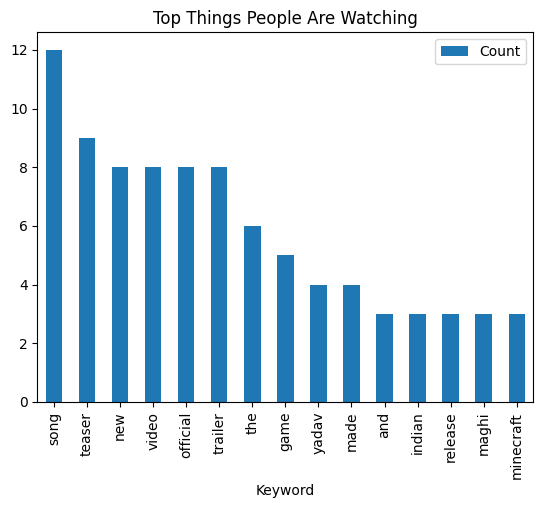

In [11]:
top_keywords.set_index("Keyword").plot(kind="bar", title="Top Things People Are Watching")


In [18]:
import re

stopwords = {"the", "and", "new", "official", "video", "made"}

def top_2_videos_per_keyword(df, keywords):
    result = {}

    for keyword in keywords:
        matched_videos = []

        for _, row in df.iterrows():
            title = row["Title"].lower()
            if re.search(rf"\b{keyword}\b", title):
                matched_videos.append({
                    "Title": row["Title"],
                    "Virality": row["Virality Score"],
                    "URL": row["URL"]
                })

        # sort by virality
        matched_videos = sorted(
            matched_videos,
            key=lambda x: x["Virality"],
            reverse=True
        )

        # keep only top 2
        result[keyword] = matched_videos[:2]

    return result



In [20]:
keywords = [
    "song", "teaser", "trailer", "game",
    "indian", "release", "yadav",
"minecraft"
]

top_videos = top_2_videos_per_keyword(df, keywords)




FOR EACH KEYWORD TOP 2 VIRAL VIDEO INFORMATION

In [21]:
for keyword, videos in top_videos.items():
    print(f"\n🔹 Section: {keyword}")
    if not videos:
        print("  No matching videos")
    for i, v in enumerate(videos, 1):
        print(f"  {i}. {v['Title']} (Virality: {v['Virality']})")




🔹 Section: song
  1. Rao Sahabni 2 | Shyam Yadav | Sanjana Yaduvanshi | new yadav song song 2026 love song  (Virality: 12.64)
  2. #Video | #Raushan Rohi #रंगदारी #मगही गाना | 2026 में राज करबौ | #Srishti Bharti | Maghi Song 2026 (Virality: 6.38)

🔹 Section: teaser
  1. BHA BHA BA Success Teaser | Dilieep | Mohanlal | Gokulam Gopalan | Vineeth| Dhyan| Dhananjay Shankar (Virality: 5.95)
  2. বিজয়নগরের হীরে (Vijaynagar'er Hirey)| Teaser | Prosenjit | Aryaan | Chandrasish Ray | 23rd Jan| SVF (Virality: 5.3)

🔹 Section: trailer
  1. I Watched Avengers: Doomsday Thor Trailer in 0.25x Speed and Here's What I Found (Virality: 7.61)
  2. Spider-Man 4 Trailer is Here? Thor Doomsday Leak? - RoastVerse 152 (Virality: 5.21)

🔹 Section: game
  1. Long Slide Game with Cow Elephant Gorilla Hippopotamus Tiger 3d Animal Game Funny 3d Animals (Virality: 30.52)
  2. Long Slide Game With Elephant Gorilla Buffalo Hippopotamus Tiger - 3d Animal Game - Funny 3d Animals (Virality: 14.85)

🔹 Section: indian
 